/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


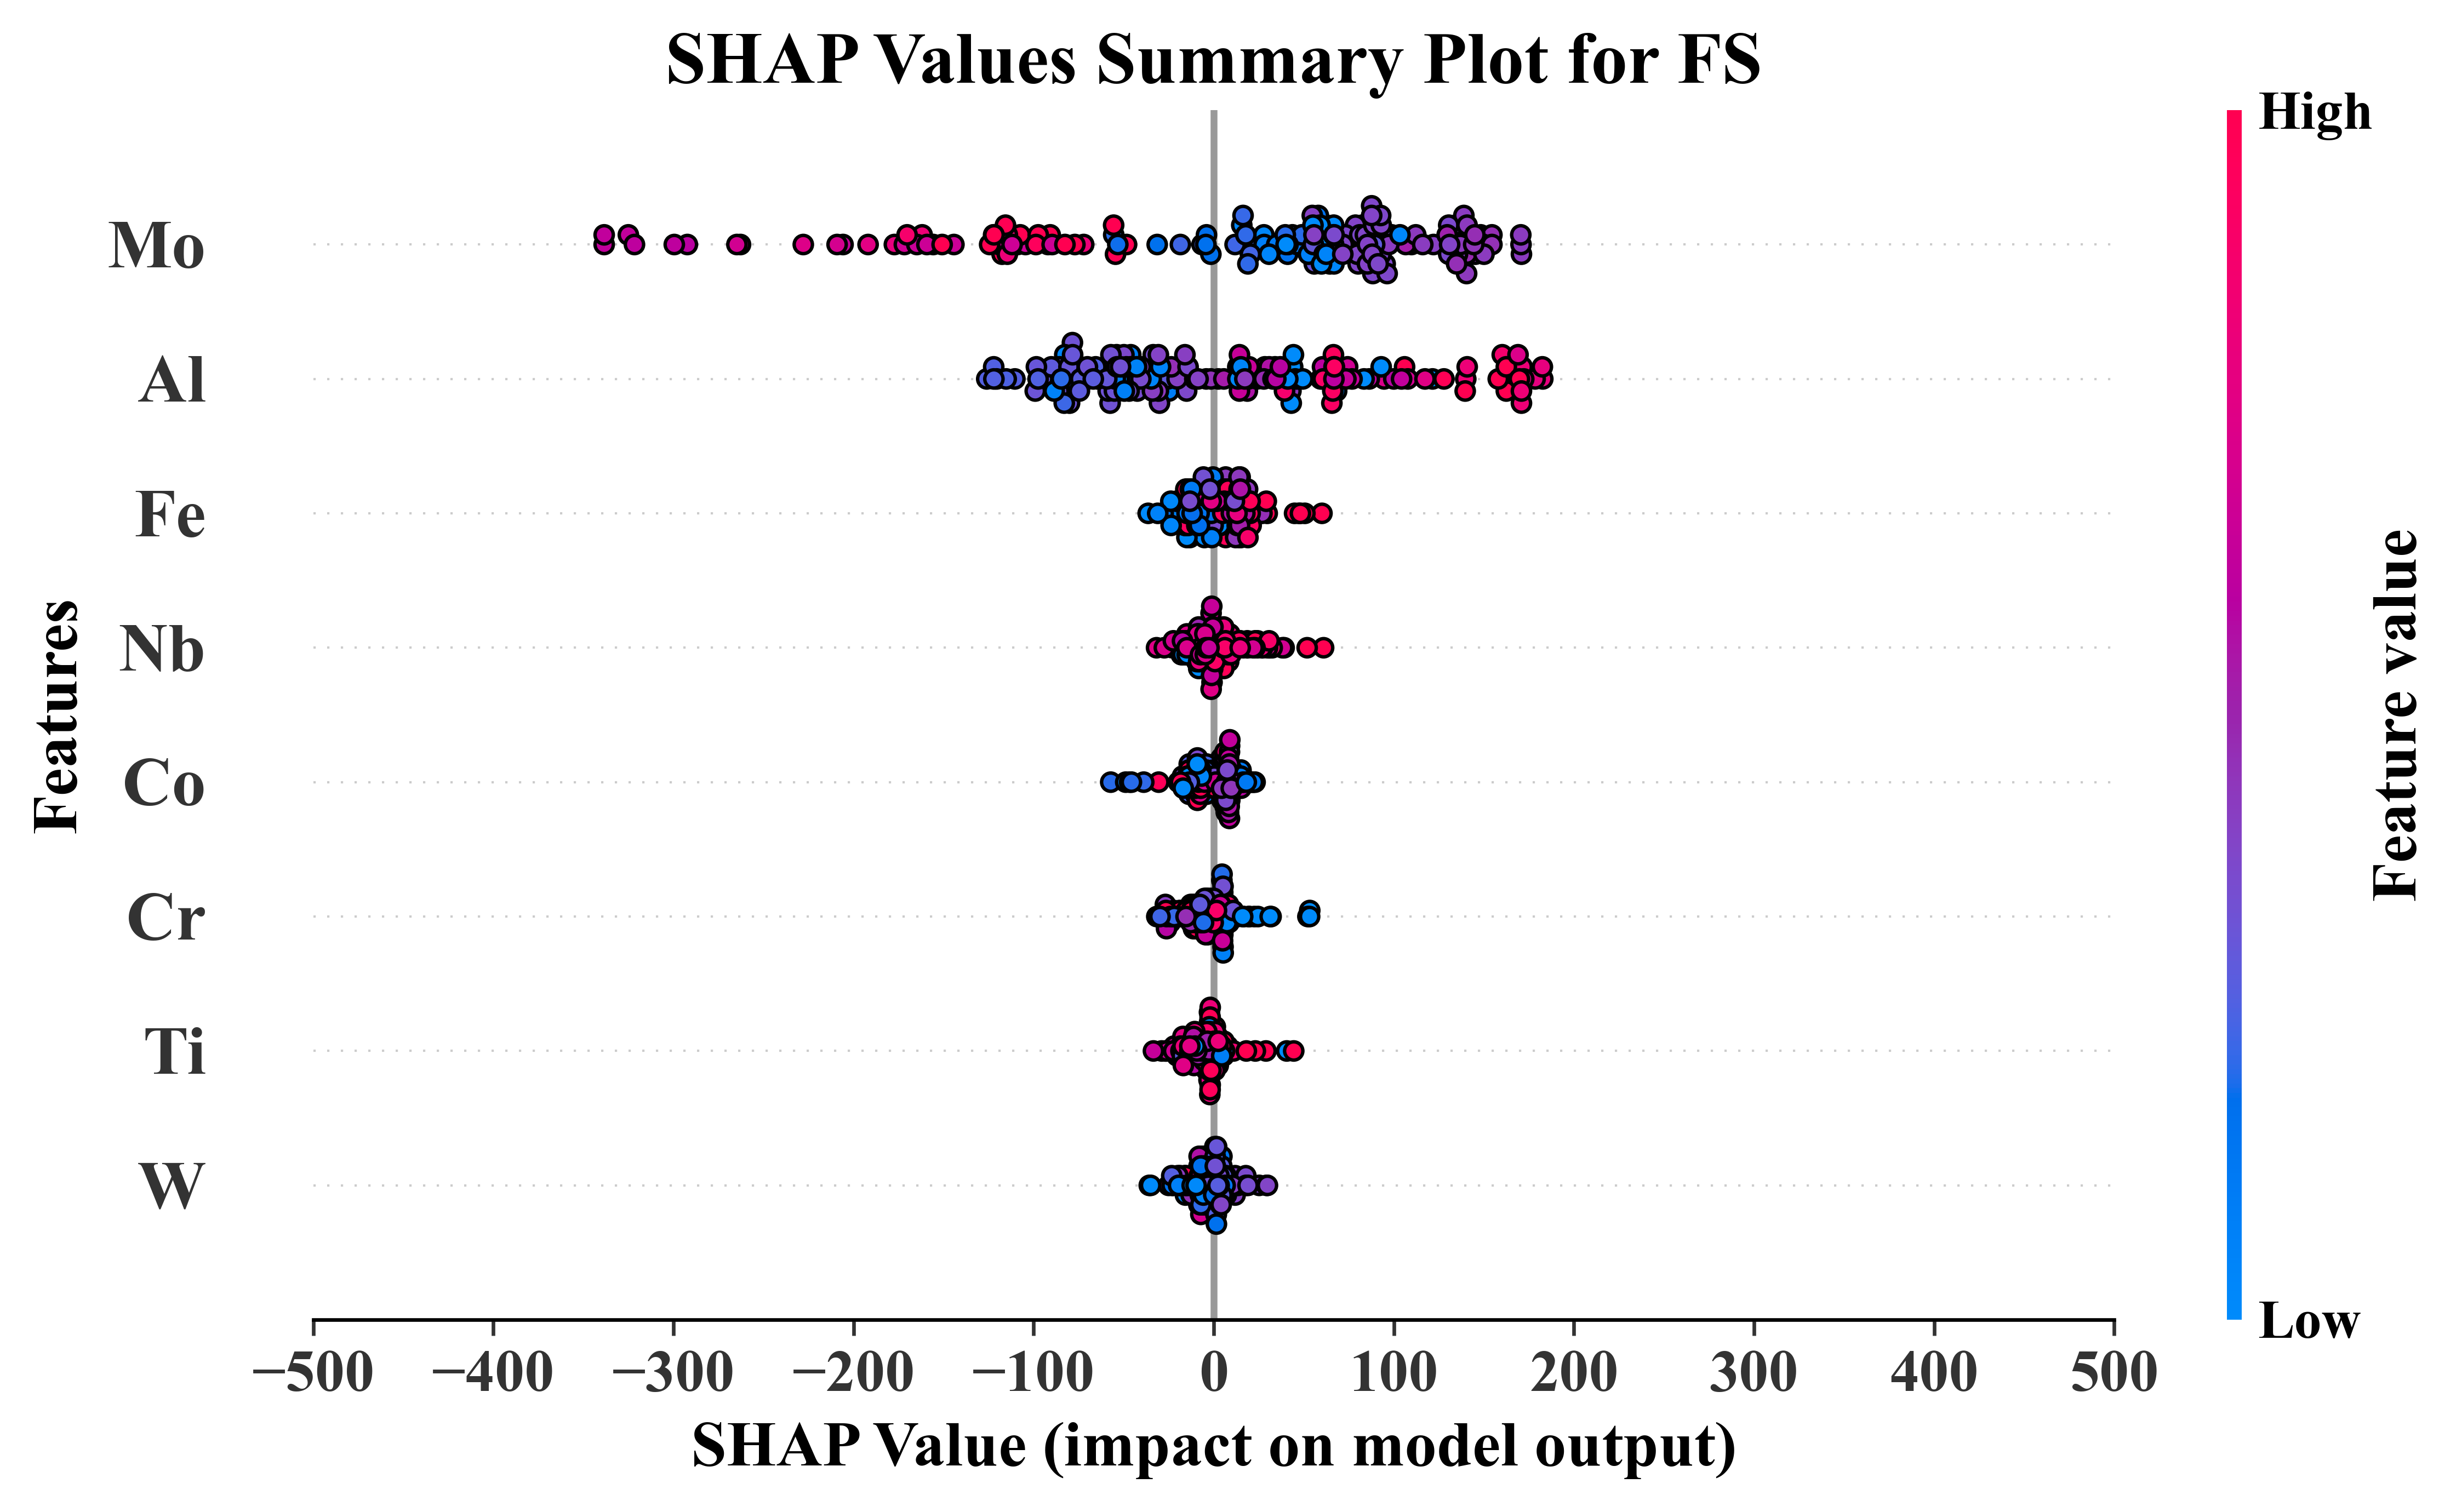

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
features = pd.read_excel('3的副本.xlsx')
labels = features['FS']  # Get labels
features = features.drop('FS', axis=1)  # Drop the label column from features

# Feature names before conversion
feature_names = features.columns  
features = MinMaxScaler().fit_transform(features)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Create the Random Forest model (single-output regression)
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values (ensure the output is a matrix)
shap_values = explainer.shap_values(X_val)
if len(shap_values.shape) == 1:
    shap_values = np.expand_dims(shap_values, axis=1)  # Expand dimensions if necessary

# Modify feature names to include subscripts (if required)
feature_names_list_modified = [name for name in feature_names_list]  # Adjust as per your needs

# Set DPI globally
plt.rcParams['figure.dpi'] = 600

# Create the SHAP summary plot
shap.summary_plot(shap_values, X_val, feature_names=feature_names_list_modified, show=False, plot_type='dot')

# Customize appearance of the plot
ax = plt.gca()
for collection in ax.collections:
    collection.set_edgecolor('black')  # Set border color
    collection.set_linewidth(0.75)  # Set border width

# Customize fonts and styles
plt.title('SHAP Values Summary Plot for FS', fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.xlabel('SHAP Value (impact on model output)', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Features', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=15, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=15, fontweight='bold', fontname='Times New Roman')

# Set x-axis range and ticks
plt.xlim(-500, 500)
plt.xticks(np.arange(-500, 501, 100), fontsize=13, fontweight='bold', fontname='Times New Roman')

# Customize the color bar
color_bar = plt.gcf().axes[-1]  # Access the color bar
color_bar.tick_params(labelsize=12, labelcolor='black', width=1.5)  # Customize tick labels and size
color_bar.set_ylabel('Feature value', fontsize=14, fontweight='bold', fontname='Times New Roman')
color_bar.set_yticklabels(color_bar.get_yticklabels(), fontweight='bold',fontname='Times New Roman')

plt.tight_layout()
plt.show()
